# Baseline Models

### Here we walk through some data exploration and do work on our baseline models.

### The outline is as follows:

1. Explore data and perform any necessary pre-processing
2. Run simple logistic regression classifer on dataset
3. How cross validation will be done with resampling and metrics
4. Try resampling methods using this classifer
5. Implement other baseline classifiers using all sampling techniques, for comparison 
6. See briefly what tuning can be done (Decision boundary thresholds, sampling ratios, best classifier parameters etc)

---
## 1. 

### Read in Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools


data_raw = pd.read_csv("creditcard.csv")
data_raw.head(10)

np.where(data_raw['Class'] == 1)

(array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
          6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
          6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
          6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
          8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
         10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
         11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
         14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
         15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
         15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
         17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
         26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
         30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
         40085,  40525,  41395,  41569,  41943,  42007,  42009, 

#### As we can see, the features have been normalised, except Time and Amount.


---

### Normalise the Amount column and drop the Time column

 Here we normalise the Amount column to align better with the other features in the data. This is to eliminate the influence of one feature over another and also to aid gradient descent learning. This is done by adding a new column that is the normalised version of the current Amount column and then dropping the old one. 

 We also drop the Time column completely. The reason for this is that the time data is simply a timestamp and for the purposes of obtaining baseline classification results, we can omit this and work solely on classification from the 29 other features, instead of introducing time series, temporal classification. Also, as there will be no feature engineering done here, timestamps over 2 days will not be useful.

---


In [39]:
# Normalise and reshape the Amount column, so it's values lie between -1 and 1
from sklearn.preprocessing import StandardScaler

# Drop the old Amount column and also the Time column
data_raw = data_raw.drop(['Time'], axis=1)

X = data_raw.loc[:, data_raw.columns != 'Class']
y = data_raw.loc[:, data_raw.columns == 'Class']

norm = StandardScaler().fit_transform(X)

data = pd.DataFrame(norm)
data['Class'] = y


data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [40]:
data.loc[624,:]

0        0.531365
1        0.066353
2        0.236100
3        0.790328
4       -0.076344
5       -0.042662
6        0.044480
7        0.037815
8       -0.319100
9        0.139232
10       1.544607
11       1.182794
12       0.392457
13       0.497262
14       0.487200
15       0.045588
16      -0.552410
17      -0.079334
18      -0.692861
19      -0.027124
20       0.256463
21       0.671945
22      -0.235533
23       0.060581
24       1.084752
25      -0.571286
26       0.057938
27       0.057626
28      -0.113824
Class    0.000000
Name: 624, dtype: float64

### Feature Engineering

In a typical data science machine learning workflow, one would usually explore the data and engineer extra features based on domain knowledge of the data and insights into what else might be useful. In this case however as the data is post-PCA and anonymised, it makes no sense to engineer further features. There could be some potential ideas such as engineering features based on transactions in a small space of time or large transaction amounts etc but since this is for baseline work only and that the data is only for a 2 day period, we wont engineer any features  or include the time column in our training.  


---

### Check for any missing values

In [41]:
data.isnull().sum().any()

False

### View data balance

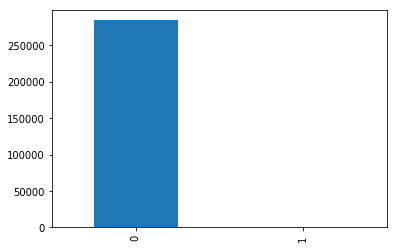

0    284315
1       492
Name: Class, dtype: int64


In [42]:
# Print a plot of class balance
classes = pd.value_counts(data['Class'], sort=True).sort_index()
classes.plot(kind = 'bar')
plt.show()
print classes

In [43]:
# Print percentage of fraudulent cases
print len(data[data['Class']==1]) / float( len(data[data['Class']==0]) + len(data[data['Class']==1]) ) *100
# 492 / 284,807 

0.172748563062


#### As we see the data is very highy unbalanced, with fraudulent examples only accounting for a mere 0.17% of the total dataset.

### Problem with Accuracy as a metric
In a lot of machine learning projects, Accuracy is a common metric to use to evaluate the perform of classification problems. However in our case this will not work. 

#### Even if we completely classified everything we see as non fraudluent, the model would still be deemed to be 99.83% accurate, which is incredibly high. 


### Metrics we care about

#### F1-score:
F1-score is the harmonic average of precision and recall. We can define precision as intuitively the ability of the classifier not to label as positive, a sample that is negative. Similarly we define recall as intuitively the ability of the classifier to find all the positive samples.

#### So why do we care about F1 score? ...

##### Recall - Catching fraudulent transactions
As described above, our model can be 99.83% accurate whilst not catching ANY fraud. Recall determines the amount of the positive class we correctly classify. So we are interested in this as the 'primary' function of the work we are doing: to classify fraud.

##### Precision - Not missclassifying non-fraudulent transactions
Of course, a model that just classifies everything as fraud is not usable. We want this to be useful and hence we dont want this to happen. So precision is also important.

#### Context of the bank
In the context of banks and how these metrics add or lose value to them, we indeed care about F1 score. As you can see from the results table for SMOTE, LinearSVC has the highest Recall score, which means it is great at finding true fraudulent cases. However, it's precision is very low at 0.06. This essentially means that the classifier performs badly when it comes to predicting some non-fraudulent data and falsly labelling them as fraud. Why is this bad? This is bad because the loses the bank money and gives customers a bad experience. If we have bad precision then we falsly classify as fraud a lot and we freeze customer cards and accounts and send them a text to say we believe there is fraud etc. Only to ultimately verify that everything is benign and reverse the situation. This is very bad and gives a bad impression for the customer, who may indeed change bank or lose faith in the bank's intelligence systems.

#### Hence, we care about F1 score, which is the balance between these two metrics. Recall: being able to catch true frauds and Precision: being able to correctly classify and reduce the number of false positives. Even when we have balanced the dataset through resampling, these metrics are still the quantities we care about.

---
## 2.
## Logistic regression (without sampling)
---
Let's setup a logistic regression classifier to run on our data.

### Imports and classifer instantiation 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

# Call the logistic regression model
lr = LogisticRegression(random_state = 0)

### Assign data to x and y and perform a train-test split on the data

In [45]:
# Assign variables x and y corresponding to row data and it's class value
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

### Fit the data in a single run and print a confusion matrix
This is just a single run for the purposes of printing a confusion matrix to give us a visualisation of how the classifer performed.

In [46]:
# Use scikitplot library for confusion matrix printing
from scikitplot.metrics import plot_confusion_matrix
# Import classification report from sklearn
from sklearn.metrics import classification_report

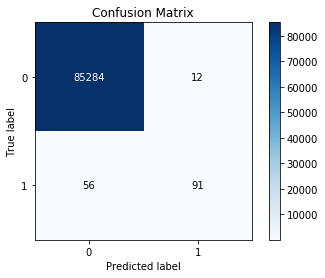

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.62      0.73       147

avg / total       1.00      1.00      1.00     85443



In [47]:
# Fit the classifier using the training data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred)
plt.show()

# Print report too
print classification_report(y_test, y_pred)

---
### Evaluation

So, as we can see, without any sampling techniques on the data, running a simple logistic regression gives us a F1 score average of around 73%. 

Despite the model being almost perfect for non-fraudluent examples, nearly 40% of fraudlent cases were incorrectly predicted. 

---

---
## Aside on C parameter of Logistic regression
---
The C parameter of the logistic regression is essentially a regularisation parameter. Increasing the regularisation strength penalises "large" weight coefficients. This is mainly so that the model performs better on unseen data and avoids learning anomolies or noise.

#### To determine the best value to give this parameter we can do a quick hyper-parameter tuning, namely Grid Search, to find the best value to use:

In [48]:
from sklearn.model_selection import GridSearchCV

# Call the logistic regression model with a certain C parameter
lr = GridSearchCV(LogisticRegression(C = 0.01, random_state=0), {'C':[0.01, 0.1, 1, 10, 100]}, scoring='f1')

# Assign variables x and y corresponding to row data and it's class value
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# # Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print "Best C parameter found: ", "\n"
print lr.best_params_, "\n"

print "Grid scores on development set:", "\n"

means = lr.cv_results_['mean_test_score']

for mean, params in zip(means, lr.cv_results_['params']):
    print "%0.3f for %r"% (mean, params)

print "Detailed classification report:"

print classification_report(y_test, y_pred)



Best C parameter found:  

{'C': 10} 

Grid scores on development set: 

0.695 for {'C': 0.01}
0.719 for {'C': 0.1}
0.725 for {'C': 1}
0.727 for {'C': 10}
0.727 for {'C': 100}
Detailed classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.62      0.73       147

avg / total       1.00      1.00      1.00     85443



#### So we can see here that C=10 is the best value to use, if using the original dataset.

---
## 3.
## Cross Validation

When cross validating using resampling techniques, you have to be careful you are not introducing any bias to the model along the way. These are some of the points addressed in the way cross validation is performed in this project:

### - In the case of oversampling and Smote, preserving a test set and resampling only training data

It is important we preserve a 'pure' real-life sample of the data for testing, that is not manipulated by resampling. This is important to test the generalisability of the model and ensures that we don't introduce any bias by using resampled data in our testing set. The whole point of validating the model is to test it's performance on unseen data, after all.

### - Oversampling inside the cross validation loop

A typical approach would perhaps be to simply oversample the data and then pass this onto cross validation. This will introduce bias by allowing oversampled minority class data points to 'leak' into the validation test set of the CV loop. This will therefore give a higher result as the model has already seen these data points. In the case of Oversampling the minority class datapoints are simply duplicated so it is especially important here. This is not the case for SMOTE, which creates synthetic data points but as described before, it is still important to preserve a 'pure' test set.

To visualise this, see the following:

![caption](cv-oversample-1.jpg)

![caption](cv-oversample-2.jpg)

Diagrams from https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation.

### - Test_Train_Split vs Custom cross_val_score using KFold

This concerns the underlying approach for the cross validation loop. We have have already seen we can use sklearn's test_train_split function to split the data into train and test portions. We can then oversample our training data, fit the model and make predictions using the test set. 

#### Approach 1 would be to simply do this multiple times and average the results. 

This approach, however, will give better results than expected (which will be shown in a later section, I go on to implement this version for comparison). The reason for this is due to the nature of test_train_split and it's randomness. 

#### Problems with this method:
Test_train_split allows you to randomly split your data, by giving a parameter that specifies the ratio. However as the split is random, it is likely that there will be overlap in the CV iterations as to which data points are put in the test set. In other words, values selected during one iteration, could be selected again during another iteration.

The consequences of this means that the model may not be exposed to particular portions of the data whereby it does not generalise well and we are not capturing that in our results. Also, It is not making maximal use of the data we have.

#### Approach 2 - KFOLD

Kfold is a well known cross validation technique whereby instead of random splitting of the data, the data is split equally into N folds. Each iteration then uses N-1 folds for training and the Nth fold for validation. This means that the classifier gets tested on all parts of our data and will capture all variations on performance. It also means we make maximal use of our data. 

#### Therefore the approach that is used is:
* Original dataset -> Cross-Val loop
* Cross-Val Loop: N interations of KFOLD technique
* Each KFOLD iteration: Oversample the training folds, every time and validate on the preserved test fold

___

### Cross Validating Logistic Regression on Original Dataset

This function is the custom cross validation for the original dataset.

It uses StratifiedKFold, which is a variation of KFold that ensures there is roughly equal class distribution in the folds.

In [49]:
def custom_cross_val_original(data, clf, n):
    '''
        data: the original dataset
        clf: the classifier to evaluate
        n: the number of iterations and hence splits to be made
        
        return: List of [name, f1_avg, precision_avg, recall_avg, train_time_avg]
    '''
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    import datetime
    from sklearn.metrics import precision_recall_fscore_support
    
    print 'Cross validating... \n'
    skfolds = StratifiedKFold(n_splits=n, random_state=0)
    
    precision = []
    recall = []
    f1score = []
    elapsed_times = []
    aucs = []
    
    cv = 0
    name = clf.__class__.__name__
    
    # Assign variables x and y corresponding to row data and it's class value
    X = data.loc[:, data.columns != 'Class']
    y = data.loc[:, data.columns == 'Class']
    
    for train_index, test_index in skfolds.split(X, y):
        cv=cv+1
        
        print '='*20
        print 'Total training length: ', len(train_index)
        print 'Total testing length: ', len(test_index)
        
        # Clone the classifier for a fresh, independant instance
        clone_clf = clone(clf)
        
        # skfolds gives us indexes of the data, so create the train and test folds using these indexes
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        print 'Training non-fraud count: ', len(y_train_folds[y_train_folds['Class']==0])
        print 'Training fraud count: ', len(y_train_folds[y_train_folds['Class']==1])
        print 'Testing non-fraud count: ', len(y_test_fold[y_test_fold['Class']==0])
        print 'Testing fraud count: ', len(y_test_fold[y_test_fold['Class']==1])
        print '='*20
        
        X_res, y_res = X_train_folds, y_train_folds
        
        # Start a timer to measure training time
        start = datetime.datetime.now()
        
        print '\n Fitting the model... CV[{}]'.format(cv), '\n'
        
        # Train / fit the model
        clone_clf.fit(X_res, y_res)
        
        end = datetime.datetime.now()
        elapsed = end - start
        elapsed_times.append(elapsed)
        
        # Make predictions
        y_pred = clone_clf.predict(X_test_fold)
        
        # Get metric results 
        prfs = precision_recall_fscore_support(y_test_fold, y_pred, pos_label=1, average='binary')
        
        precision.append(prfs[0])
        recall.append(prfs[1])
        f1score.append(prfs[2])
        
        from sklearn.metrics import roc_curve, auc, roc_auc_score

        auc = roc_auc_score(y_test_fold, y_pred)
        aucs.append(auc)
        
    
    average_timedelta = sum(elapsed_times, datetime.timedelta(0)) / len(elapsed_times)
    entry = [name, np.mean(f1score), np.mean(precision), np.mean(recall), np.mean(aucs), average_timedelta]
    print('Mean scores: ', entry )
    return entry

### Create log for original dataset results

In [50]:
# Create dataframe for Original dataset results

# Setting up dataframe table properties
log_cols=["Classifier", "F1 Score", "Precision", "Recall", "AUC", "Training Time"]
log_original = pd.DataFrame(columns=log_cols)

# Replace table index by the Classifier column
log_original.set_index('Classifier', inplace=True)


### Random seed for reproducibility

In [51]:
np.random.seed(0)

### Run cross val on original dataset, using logistic regression

In [52]:
lr = LogisticRegression(C = 10, random_state=0)

entry = custom_cross_val_original(data, lr, 3)

log_entry = pd.DataFrame([entry], columns=log_cols)
log_original = log_original.append(log_entry)

Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164

 Fitting the model... CV[3] 

('Mean scores: ', ['LogisticRegression', 0.67952618651529617, 0.85868002556977541, 0.58536585365853655, 0.79258796181195568, datetime.timedelta(0, 1, 797085)])


In [53]:
print log_original

        AUC          Classifier  F1 Score  Precision    Recall   Training Time
0  0.792588  LogisticRegression  0.679526    0.85868  0.585366 00:00:01.797085


### In comparison to before:
#### f1 = 0.73 (without cross validation)
#### f1 = 0.68 (with cross validation)

___

---
## 4. Resampling methods

## Undersampling 
---
#### Here, we will attempt undersampling by reducing the number of the majority class, down to a 50:50 ratio with the minority class

The following is a function that undersamples the dataset, using a random seed that ensures it's the same everytime for validation purposes.

In [54]:
def undersample_data(data):

    fraud_indices = np.array(data[data.Class == 1].index)
    print 'Number of frauds', len(fraud_indices)

    non_fraud = data[data.Class==0]
    fraud = data[data.Class==1]

    print 'number of non fraud: ', len(non_fraud)
    non_fraud = non_fraud.loc[np.random.choice(non_fraud.index, len(fraud_indices), replace=False)]

    undersampled_data = pd.concat([non_fraud, fraud])
    print 'non_fraud after: ', len(non_fraud)

    # Assign variables x and y corresponding to row data and it's class value
    X = undersampled_data.loc[:, data.columns != 'Class']
    y = undersampled_data.loc[:, data.columns == 'Class']
    
    return X, y

### Single run, with confusion matrix

Number of frauds 345
number of non fraud:  199019
non_fraud after:  345


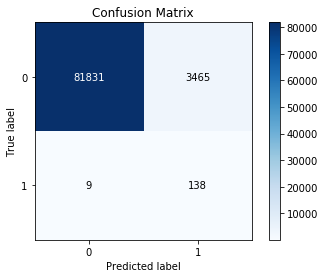

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85296
          1       0.04      0.94      0.07       147

avg / total       1.00      0.96      0.98     85443



In [55]:

# Call the logistic regression model with a certain C parameter
lr = LogisticRegression(C = 10, random_state=0)

# Assign variables x and y corresponding to row data and it's class value


# Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

data_tosample = pd.DataFrame(X_train)
data_tosample['Class'] = y_train
X_train_under,y_train_under = undersample_data(data_tosample)


lr.fit(X_train_under, y_train_under)
y_pred = lr.predict(X_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred)
plt.show()

# Print report too
print classification_report(y_test, y_pred)



### With Cross Validation

### Create log for undersample dataset results

In [56]:
# Create dataframe for undersample dataset results

# Setting up dataframe table properties
log_cols=["Classifier", "F1 Score", "Precision", "Recall","AUC", "Training Time"]
log_under = pd.DataFrame(columns=log_cols)

# Replace table index by the Classifier column
log_under.set_index('Classifier', inplace=True)


### Undersample Cross-Val function

In [57]:
def custom_cross_val_under(data, clf, n):
    '''
        data: the original dataset
        clf: the classifier to evaluate
        n: the number of iterations and hence splits to be made
        
        return: List of [name, f1_avg, precision_avg, recall_avg, train_time_avg]
    '''
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    import datetime
    from sklearn.metrics import precision_recall_fscore_support
    
    print 'Cross validating... \n'
    skfolds = StratifiedKFold(n_splits=n, random_state=0)
    
    precision = []
    recall = []
    f1score = []
    elapsed_times = []
    aucs = []
    cv = 0
    name = clf.__class__.__name__
    
    # Assign variables x and y corresponding to row data and it's class value
    X = data.loc[:, data.columns != 'Class']
    y = data.loc[:, data.columns == 'Class']
    
    for train_index, test_index in skfolds.split(X, y):
        cv=cv+1
        
        print '='*20
        print 'Total training length: ', len(train_index)
        print 'Total testing length: ', len(test_index)
        
        # Clone the classifier for a fresh, independant instance
        clone_clf = clone(clf)
        
        # skfolds gives us indexes of the data, so create the train and test folds using these indexes
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        print 'Training non-fraud count: ', len(y_train_folds[y_train_folds['Class']==0])
        print 'Training fraud count: ', len(y_train_folds[y_train_folds['Class']==1])
        print 'Testing non-fraud count: ', len(y_test_fold[y_test_fold['Class']==0])
        print 'Testing fraud count: ', len(y_test_fold[y_test_fold['Class']==1])
        print '='*20
        
        
        data_tosample = pd.DataFrame(X_train_folds)
        data_tosample['Class'] = y_train_folds
        X_train_under, y_train_under = undersample_data(data_tosample)


        X_res, y_res = X_train_under, y_train_under
        
        # Start a timer to measure training time
        start = datetime.datetime.now()
        
        print '\n Fitting the model... CV[{}]'.format(cv), '\n'
        
        # Train / fit the model
        clone_clf.fit(X_res, y_res)
        
        end = datetime.datetime.now()
        elapsed = end - start
        elapsed_times.append(elapsed)
        
        # Make predictions
        y_pred = clone_clf.predict(X_test_fold)
        
        # Get metric results 
        prfs = precision_recall_fscore_support(y_test_fold, y_pred, pos_label=1, average='binary')
        
        precision.append(prfs[0])
        recall.append(prfs[1])
        f1score.append(prfs[2])
        
        from sklearn.metrics import roc_curve, auc, roc_auc_score

        auc = roc_auc_score(y_test_fold, y_pred)
        aucs.append(auc)
        
        
    
    average_timedelta = sum(elapsed_times, datetime.timedelta(0)) / len(elapsed_times)
    entry = [name, np.mean(f1score), np.mean(precision), np.mean(recall), np.mean(aucs),average_timedelta]
    print('Mean scores: ', entry )
    return entry

In [58]:
lr = LogisticRegression(C = 10, random_state=0)

entry = custom_cross_val_under(data, lr, 3)

log_entry = pd.DataFrame([entry], columns=log_cols)
log_under = log_under.append(log_entry)

Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189544
non_fraud after:  328

 Fitting the model... CV[3] 

('Mean scores: ', ['LogisticRegression', 0.062810517935311005, 0.032562180590586264, 0.88414634146341464, 0.91933782400741049, datet

In [59]:
log_under

,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.919338,LogisticRegression,0.062811,0.032562,0.884146,00:00:00.005163


In [60]:
log_original

,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.792588,LogisticRegression,0.679526,0.85868,0.585366,00:00:01.797085


### Evaluation 

#### As we can see, by bringing the data to a 50:50 ratio, we bring the f1 performance up to 92% average! up from 68%.
This is a significant increase.

---
## Oversampling 
---

Next, we want to try oversampling techniques. This is where the minority class (the fraudulent cases) is scaled up in size, to compare more equally with the number of the majority class. 

Oversampling in particular is duplication of minority class data points. 

#### A way we can do this is by random oversampling, which randomly duplicates data. Let's see how this performs...

In [61]:
def oversample_data(x_data, y_data):

    from collections import Counter
    from imblearn.over_sampling import RandomOverSampler 
    ros = RandomOverSampler(random_state=1)
    X_res, y_res = ros.fit_sample(x_data, y_data)
    print('Original dataset shape {}'.format(Counter(data['Class'])))
    print('Training dataset shape {}'.format(Counter(y_data['Class'])))
    print('Resampled training dataset shape {}'.format(Counter(y_res)))

    return X_res, y_res

### Single run, with confusion matrix

Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 284315, 1: 492})
Resampled training dataset shape Counter({0: 284315, 1: 284315})


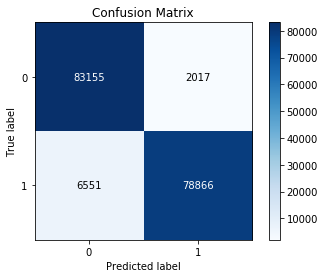

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     85172
          1       0.98      0.92      0.95     85417

avg / total       0.95      0.95      0.95    170589



In [62]:
# re-assign X and Y values
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Call the logistic regression model with a certain C parameter
lr = LogisticRegression(C = 10, random_state=0)

# Assign variables x and y corresponding to row data and it's class value
X_over,y_over = oversample_data(X,y)

# Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size = 0.3, random_state = 0)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred)
plt.show()

# Print report too
print classification_report(y_test, y_pred)



### Hold on. 0.95 F1 score seems incredibly high. Well, notice that we are oversampling BEFORE splitting. Therefore when testing, the model has seen data before

### The proper way...

Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 199019, 1: 345})
Resampled training dataset shape Counter({0: 199019, 1: 199019})


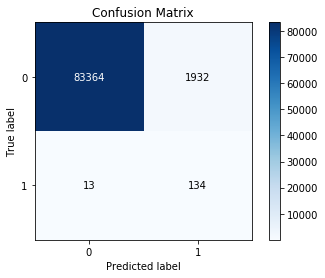

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.06      0.91      0.12       147

avg / total       1.00      0.98      0.99     85443



In [63]:
# re-assign X and Y values
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Call the logistic regression model with a certain C parameter
lr = LogisticRegression(C = 10, random_state=0)

# Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


# oversample training only
X_over,y_over = oversample_data(X_train,y_train)

lr.fit(X_over, y_over)
y_pred = lr.predict(X_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred)
plt.show()

# Print report too
print classification_report(y_test, y_pred)



### With Cross Validation

### Create log for oversample dataset results

In [64]:
# Create dataframe for oversample dataset results

# Setting up dataframe table properties
log_cols=["Classifier", "F1 Score", "Precision", "Recall", "AUC", "Training Time"]
log_over = pd.DataFrame(columns=log_cols)

# Replace table index by the Classifier column
log_over.set_index('Classifier', inplace=True)


### Oversample Cross-Val function

In [65]:
def custom_cross_val_over(X,y, clf, n):
    '''
        X: the original dataset X values
        y: the original dataset y values
        clf: the classifier to evaluate
        n: the number of iterations and hence splits to be made
        
        return: List of [name, f1_avg, precision_avg, recall_avg, train_time_avg]
    '''
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    import datetime
    from sklearn.metrics import precision_recall_fscore_support
    
    print 'Cross validating... \n'
    skfolds = StratifiedKFold(n_splits=n, random_state=0)
    
    precision = []
    recall = []
    f1score = []
    elapsed_times = []
    aucs = []
    cv = 0
    name = clf.__class__.__name__
    
    for train_index, test_index in skfolds.split(X, y):
        cv=cv+1
        
        print '='*20
        print 'Total training length: ', len(train_index)
        print 'Total testing length: ', len(test_index)
        
        # Clone the classifier for a fresh, independant instance
        clone_clf = clone(clf)
        
        # skfolds gives us indexes of the data, so create the train and test folds using these indexes
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        print 'Training non-fraud count: ', len(y_train_folds[y_train_folds['Class']==0])
        print 'Training fraud count: ', len(y_train_folds[y_train_folds['Class']==1])
        print 'Testing non-fraud count: ', len(y_test_fold[y_test_fold['Class']==0])
        print 'Testing fraud count: ', len(y_test_fold[y_test_fold['Class']==1])
        print '='*20
        
        X_res, y_res = oversample_data(X_train_folds, y_train_folds )
        
        # Start a timer to measure training time
        start = datetime.datetime.now()
        
        print '\n Fitting the model... CV[{}]'.format(cv), '\n'
        
        # Train / fit the model
        clone_clf.fit(X_res, y_res)
        
        end = datetime.datetime.now()
        elapsed = end - start
        elapsed_times.append(elapsed)
        
        # Make predictions
        y_pred = clone_clf.predict(X_test_fold)
        
        # Get metric results 
        prfs = precision_recall_fscore_support(y_test_fold, y_pred, pos_label=1, average='binary')
        
        precision.append(prfs[0])
        recall.append(prfs[1])
        f1score.append(prfs[2])
        
        from sklearn.metrics import roc_curve, auc, roc_auc_score

        auc = roc_auc_score(y_test_fold, y_pred)
        aucs.append(auc)
        
    
    average_timedelta = sum(elapsed_times, datetime.timedelta(0)) / len(elapsed_times)
    entry = [name, np.mean(f1score), np.mean(precision), np.mean(recall), np.mean(aucs), average_timedelta]
    print('Mean scores: ', entry )
    return entry

In [66]:
lr = LogisticRegression(C = 10, random_state=0)

entry = custom_cross_val_over(X, y, lr, 3)

log_entry = pd.DataFrame([entry], columns=log_cols)
log_over = log_over.append(log_entry)

Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 189543, 1: 328})
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 189543, 1: 328})
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Original dataset shape Counter({0: 284315

#### Comparison so far...

In [67]:
log_over


,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.933744,LogisticRegression,0.111965,0.059809,0.892276,00:00:03.430102


In [68]:
log_original

,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.792588,LogisticRegression,0.679526,0.85868,0.585366,00:00:01.797085


In [69]:
log_under

,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.919338,LogisticRegression,0.062811,0.032562,0.884146,00:00:00.005163


### Evaluation

#### We can see that by oversampling, at least with the logistic regression classifier, that the precision hits rock bottom.

---
## SMOTE ( Preserving test data - oversampling training data only)
---

### Now we try the SMOTE method (Synthetic Minority Oversampling Technique). 
#### This will oversample our minority data in a similar fashion as before, except the new data will be synthetic ones, which means fraudulent data will be slightly modified (i.e noise added, tweak of value etc) to create new examples.

#### The procedure is similar to before, sampling training data only to preserve test data

In [70]:
def smote_data(x_data, y_data):
    from collections import Counter
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X_res, y_res = sm.fit_sample(x_data, y_data)
    print('Resampling the data with SMOTE. . .')
    print('Resampled training dataset shape {}'.format(Counter(y_res)))

    return X_res, y_res

Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199019, 1: 199019})


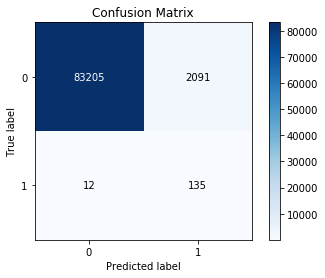

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.06      0.92      0.11       147

avg / total       1.00      0.98      0.99     85443



In [71]:
# re-assign X and Y values
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Call the logistic regression model with a certain C parameter
lr = LogisticRegression(C = 10, random_state=0)

# Whole dataset, training-test data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


# oversample training only
X_smote,y_smote = smote_data(X_train,y_train)

lr.fit(X_smote, y_smote)
y_pred = lr.predict(X_test)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred)
plt.show()

# Print report too
print classification_report(y_test, y_pred)

### With Cross Validation

### Create log for smote dataset results

In [72]:
# Create dataframe for smote dataset results

# Setting up dataframe table properties
log_cols=["Classifier", "F1 Score", "Precision", "Recall", "AUC", "Training Time"]
log_smote = pd.DataFrame(columns=log_cols)

# Replace table index by the Classifier column
log_smote.set_index('Classifier', inplace=True)


### Smote Cross-Val function

In [73]:
def custom_cross_val_smote(X,y, clf, n):
    '''
        X: the original dataset X values
        y: the original dataset y values
        clf: the classifier to evaluate
        n: the number of iterations and hence splits to be made
        
        return: List of [name, f1_avg, precision_avg, recall_avg, train_time_avg]
    '''
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    import datetime
    from sklearn.metrics import precision_recall_fscore_support
    
    print 'Cross validating... \n'
    skfolds = StratifiedKFold(n_splits=n, random_state=0)
    
    precision = []
    recall = []
    f1score = []
    elapsed_times = []
    aucs = []
    cv = 0
    name = clf.__class__.__name__
    
    for train_index, test_index in skfolds.split(X, y):
        cv=cv+1
        
        print '='*20
        print 'Total training length: ', len(train_index)
        print 'Total testing length: ', len(test_index)
        
        # Clone the classifier for a fresh, independant instance
        clone_clf = clone(clf)
        
        # skfolds gives us indexes of the data, so create the train and test folds using these indexes
        X_train_folds = X.iloc[train_index]
        y_train_folds = y.iloc[train_index]
        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]
        
        
        print 'Training non-fraud count: ', len(y_train_folds[y_train_folds['Class']==0])
        print 'Training fraud count: ', len(y_train_folds[y_train_folds['Class']==1])
        print 'Testing non-fraud count: ', len(y_test_fold[y_test_fold['Class']==0])
        print 'Testing fraud count: ', len(y_test_fold[y_test_fold['Class']==1])
        print '='*20
        
        X_res, y_res = smote_data(X_train_folds, y_train_folds )
        
        # Start a timer to measure training time
        start = datetime.datetime.now()
        
        print '\n Fitting the model... CV[{}]'.format(cv), '\n'
        
        # Train / fit the model
        clone_clf.fit(X_res, y_res)
        
        end = datetime.datetime.now()
        elapsed = end - start
        elapsed_times.append(elapsed)
        
        # Make predictions
        y_pred = clone_clf.predict(X_test_fold)
        
        # Get metric results 
        prfs = precision_recall_fscore_support(y_test_fold, y_pred, pos_label=1, average='binary')
        
        precision.append(prfs[0])
        recall.append(prfs[1])
        f1score.append(prfs[2])
        
        from sklearn.metrics import roc_curve, auc, roc_auc_score

        auc = roc_auc_score(y_test_fold, y_pred)
        aucs.append(auc)
    
    average_timedelta = sum(elapsed_times, datetime.timedelta(0)) / len(elapsed_times)
    entry = [name, np.mean(f1score), np.mean(precision), np.mean(recall), np.mean(aucs), average_timedelta]
    print('Mean scores: ', entry )
    return entry

In [74]:
lr = LogisticRegression(C = 10, random_state=0)

entry = custom_cross_val_smote(X, y, lr, 3)

log_entry = pd.DataFrame([entry], columns=log_cols)
log_smote = log_smote.append(log_entry)

Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189544, 1: 189544})

 Fitting the model... CV[3] 

('Mean scores: ', ['LogisticRegression', 0.10

In [75]:
log_smote

,AUC,Classifier,F1 Score,Precision,Recall,Training Time
0,0.924311,LogisticRegression,0.107417,0.057296,0.873984,00:00:03.371121


### Evaluation

#### The smote results for Logistic Regression are similar to that of Oversample but slightly less. This if to be expected if you think that oversampling duplicates data points so there is likely to be some slight bias in the model

---

## 5. Other classifiers
___

In [76]:
########################################################################
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(),
    LinearSVC(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    MLPClassifier(random_state=0),
    GaussianNB()]

### All classifiers - original dataset

In [77]:

print("="*30)

# Loop over the classifiers, fit the data over 3 iterations, gather results, input to dataframe table
for clf in classifiers:
    precision = []
    recall = []
    f1score = []
    elapsed_times = []

    name = clf.__class__.__name__
    
    print(name)

    entry = custom_cross_val_original(data, clf, 3)
    
    print("="*30)

    log_entry = pd.DataFrame([entry], columns=log_cols)
    log_original = log_original.append(log_entry)

print 'Cross validation training results: '
print log_original 

print("="*30)

KNeighborsClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[1] 



/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164

 Fitting the model... CV[3] 

('Mean scores: ', ['KNeighborsClassifier', 0.77730565841144639, 0.83485515819655953, 0.73983739837398377, 0.86977976917116662, datetime.timedelta(0, 0, 672632)])
LinearSVC
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  1

/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164

 Fitting the model... CV[3] 

('Mean scores: ', ['RandomForestClassifier', 0.78957192823188294, 0.86700554478778669, 0.73780487804878048, 0.86878988812643332, datetime.timedelta(0, 12, 843904)])
MLPClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[1] 



/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164

 Fitting the model... CV[3] 

('Mean scores: ', ['MLPClassifier', 0.75967245982382348, 0.80188466575135153, 0.73780487804878048, 0.86871954386160122, datetime.timedelta(0, 11, 169219)])
GaussianNB
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164

 

### All classifiers - Undersampled dataset

In [78]:

print("="*30)

# Loop over the classifiers, fit the data over 3 iterations, gather results, input to dataframe table
for clf in classifiers:
    precision = []
    recall = []
    f1score = []
    elapsed_times = []

    name = clf.__class__.__name__
    
    print(name)

    entry = custom_cross_val_under(data, clf, 3)
    
    print("="*30)

    log_entry = pd.DataFrame([entry], columns=log_cols)
    log_under = log_under.append(log_entry)

print 'Cross validation training results: '
print log_under 

print("="*30)

KNeighborsClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[1] 



/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189544
non_fraud after:  328

 Fitting the model... CV[3] 

('Mean scores: ', ['KNeighborsClassifier', 0.12827504375699719, 0.069294293757968084, 0.88414634146341464, 0.93155491580741412, datetime.timedelta(0, 0, 1351)])
LinearSVC
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud afte

/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189544
non_fraud after:  328

 Fitting the model... CV[3] 

('Mean scores: ', ['RandomForestClassifier', 0.10025573325811132, 0.053307576011490804, 0.88617886178861793, 0.92864595688120311, datetime.timedelta(0, 0, 38678)])
MLPClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[1] 



/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after:  328

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189544
non_fraud after:  328

 Fitting the model... CV[3] 

('Mean scores: ', ['MLPClassifier', 0.073165846920125829, 0.038146573601493067, 0.89634146341463417, 0.92856044659530246, datetime.timedelta(0, 0, 523923)])
GaussianNB
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Number of frauds 328
number of non fraud:  189543
non_fraud after: 

### All classifiers - Oversampled dataset

In [79]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [80]:
print("="*30)

# Loop over the classifiers, fit the data over 3 iterations, gather results, input to dataframe table
for clf in classifiers:
    precision = []
    recall = []
    f1score = []
    elapsed_times = []

    name = clf.__class__.__name__
    
    print(name)

    entry = custom_cross_val_over(X,y, clf, 3)
    
    print("="*30)

    log_entry = pd.DataFrame([entry], columns=log_cols)
    log_over = log_over.append(log_entry)

print 'Cross validation training results: '
print log_over

print("="*30)

KNeighborsClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 189543, 1: 328})
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 189543, 1: 328})
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Original dataset sha

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Original dataset shape Counter({0: 284315, 1: 492})
Training dataset shape Counter({0: 189544, 1: 328})
Resampled training dataset shape Counter({0: 189544, 1: 189544})

 Fitting the model... CV[3] 

('Mean scores: ', ['GaussianNB', 0.10059091425113059, 0.053460583826191954, 0.85569105691056901, 0.91466824363815347, datetime.timedelta(0, 0, 180164)])
Cross validation training results: 
        AUC              Classifier  F1 Score  Precision    Recall  \
0  0.933744      LogisticRegression  0.111965   0.059809  0.892276   
0  0.892538    KNeighborsClassifier  0.625977   0.553314  0.786585   
0  0.924837               LinearSVC  0.118897   0.063827  0.871951   
0  0.831985  DecisionTreeClassifier  0.649036   0.661330  0.664634   
0  0.872869  RandomForestClassifier  0.801992   0.884864  0.745935   
0  0.875552 

### All classifiers - Smote dataset

In [81]:
print("="*30)

# Loop over the classifiers, fit the data over 3 iterations, gather results, input to dataframe table
for clf in classifiers:
    precision = []
    recall = []
    f1score = []
    elapsed_times = []

    name = clf.__class__.__name__
    
    print(name)

    entry = custom_cross_val_smote(X,y, clf, 3)
    
    print("="*30)

    log_entry = pd.DataFrame([entry], columns=log_cols)
    log_smote = log_smote.append(log_entry)

print 'Cross validation training results: '
print log_smote

print("="*30)

KNeighborsClassifier
Cross validating... 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[1] 

Total training length:  189871
Total testing length:  94936
Training non-fraud count:  189543
Training fraud count:  328
Testing non-fraud count:  94772
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189543, 1: 189543})

 Fitting the model... CV[2] 

Total training length:  189872
Total testing length:  94935
Training non-fraud count:  189544
Training fraud count:  328
Testing non-fraud count:  94771
Testing fraud count:  164
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 189544, 1: 189544})

 Fitting the model... CV[3] 

('Mean scores: ', ['KNei

## All Results

In [82]:
print log_original, '\n'
print log_under, '\n'
print log_over, '\n'
print log_smote, '\n'

        AUC              Classifier  F1 Score  Precision    Recall  \
0  0.792588      LogisticRegression  0.679526   0.858680  0.585366   
0  0.869780    KNeighborsClassifier  0.777306   0.834855  0.739837   
0  0.840350               LinearSVC  0.752517   0.887192  0.680894   
0  0.873483  DecisionTreeClassifier  0.648748   0.584061  0.747967   
0  0.868790  RandomForestClassifier  0.789572   0.867006  0.737805   
0  0.868720           MLPClassifier  0.759672   0.801885  0.737805   
0  0.905594              GaussianNB  0.114077   0.061255  0.833333   

    Training Time  
0 00:00:01.797085  
0 00:00:00.672632  
0 00:00:51.821863  
0 00:00:12.975007  
0 00:00:12.843904  
0 00:00:11.169219  
0 00:00:00.101136   

        AUC              Classifier  F1 Score  Precision    Recall  \
0  0.919338      LogisticRegression  0.062811   0.032562  0.884146   
0  0.931555    KNeighborsClassifier  0.128275   0.069294  0.884146   
0  0.912220               LinearSVC  0.068514   0.035956  0.876016 

## Averaging runs - the wrong way to validate

#### Here, we simply perform a test train split and train the model, averaging 3 times to get results. This is to show the difference in results if we do it this way.

In [83]:
def generate_train_test_sample(x_data, y_data): 
    ''' 1) Generate new, random train-test split
        2) Random smote oversample the train data, keeping test data unseen
        3) Use this new train-test split to fit and test model
    '''

    X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3)

    from collections import Counter
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X_res, y_res = sm.fit_sample(X_train, y_train)
    print('Resampling the data with SMOTE. . .')
    print('Resampled training dataset shape {}'.format(Counter(y_res)))

    return X_res, y_res, X_test, y_test

In [84]:
########################################################################
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    LinearSVC(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    MLPClassifier(),
    GaussianNB()]

In [85]:
# Assign variables x and y corresponding to row data and it's class value
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [86]:
import pickle

In [87]:
pickle.dump( log_original , open( "baseline_log_original-auc.pickle", "wb" ) )

In [88]:
pickle.dump( log_under , open( "baseline_log_under-auc.pickle", "wb" ) )

In [89]:
pickle.dump( log_over , open( "baseline_log_over-auc.pickle", "wb" ) )

In [90]:
pickle.dump( log_smote , open( "baseline_log_smote-auc.pickle", "wb" ) )

In [91]:
import datetime
from sklearn.metrics import precision_recall_fscore_support

# Setting up dataframe table properties
log_cols=["Classifier", "F1 Score", "Precision", "Recall", "AUC", "Training Time"]
log_avg = pd.DataFrame(columns=log_cols)

# Replace table index by the Classifier column
log_avg.set_index('Classifier', inplace=True)

# Loop over the classifiers, fit the data over 3 iterations, gather results, input to dataframe table
for clf in classifiers:
    precision = []
    recall = []
    f1score = []
    elapsed_times = []
    aucs = []
    
    print("="*30)
    name = clf.__class__.__name__
    
    print(name)
    for i in range(3):
        X_res, y_res, X_test, y_test = generate_train_test_sample(X, y)

        start = datetime.datetime.now()
        clf.fit(X_train, y_train)
        end = datetime.datetime.now()
        elapsed = end - start

        y_pred = clf.predict(X_test)

        prfs = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')

        precision.append(prfs[0])
        recall.append(prfs[1])
        f1score.append(prfs[2])
        elapsed_times.append(elapsed)
        
        from sklearn.metrics import roc_curve, auc, roc_auc_score

        auc = roc_auc_score(y_test, y_pred)
        aucs.append(auc)

    print("="*30)

    average_timedelta = sum(elapsed_times, datetime.timedelta(0)) / len(elapsed_times)
    entry = [name, np.mean(f1score), np.mean(precision), np.mean(recall), np.mean(aucs), average_timedelta]
    log_entry = pd.DataFrame([entry], columns=log_cols)
    log_avg = log_avg.append(log_entry)


print 'Cross validation training results: '
print log_avg 

print("="*30)

LogisticRegression
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199022, 1: 199022})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199013, 1: 199013})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199018, 1: 199018})
KNeighborsClassifier
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199020, 1: 199020})


/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199034, 1: 199034})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199019, 1: 199019})
LinearSVC
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199023, 1: 199023})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199016, 1: 199016})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199022, 1: 199022})
DecisionTreeClassifier
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199014, 1: 199014})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199024, 1: 199024})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199018, 1: 199018})
RandomForestClassifier
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199032, 1: 199032})


/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199017, 1: 199017})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199018, 1: 199018})
MLPClassifier
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199022, 1: 199022})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199017, 1: 199017})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199022, 1: 199022})
GaussianNB
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199024, 1: 199024})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199015, 1: 199015})
Resampling the data with SMOTE. . .
Resampled training dataset shape Counter({0: 199014, 1: 199014})
Cross validation training results: 
        AUC              Classifier  F1 Score  Precision    Recall  \
0  0.813727      LogisticRegression  0.741892   0.911514  0.6

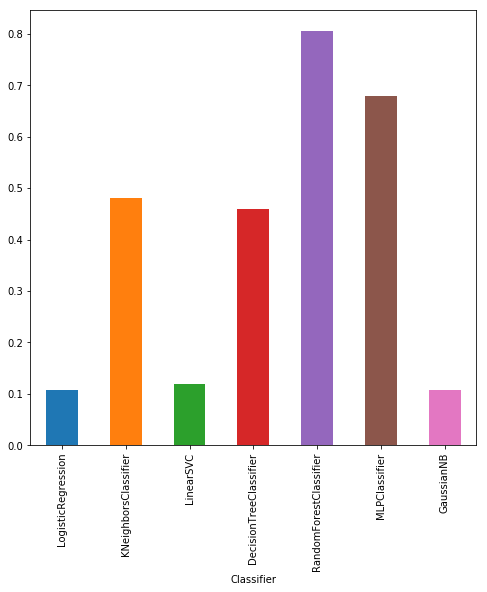

In [92]:
ax = log_smote.plot(x="Classifier", y="F1 Score", kind="bar", figsize=(8,8), legend=False)
plt.show()

log_original.plot(ax=ax)
plt.show()

/Users/HarryG1/Documents/University/Year_3/DeepLearning-CreditCardFraud/devEnv/lib/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


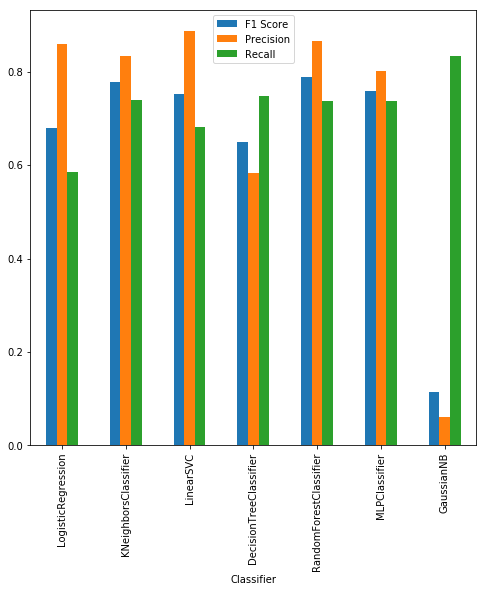

In [93]:
log_original.plot(x="Classifier", y=["F1 Score", "Precision", "Recall"], kind="bar", figsize=(8,8))
plt.show()

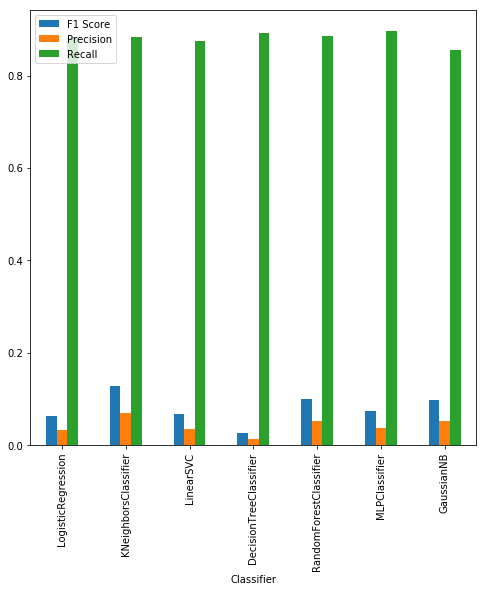

In [94]:
log_under.plot(x="Classifier", y=["F1 Score", "Precision", "Recall"], kind="bar", figsize=(8,8))
plt.show()


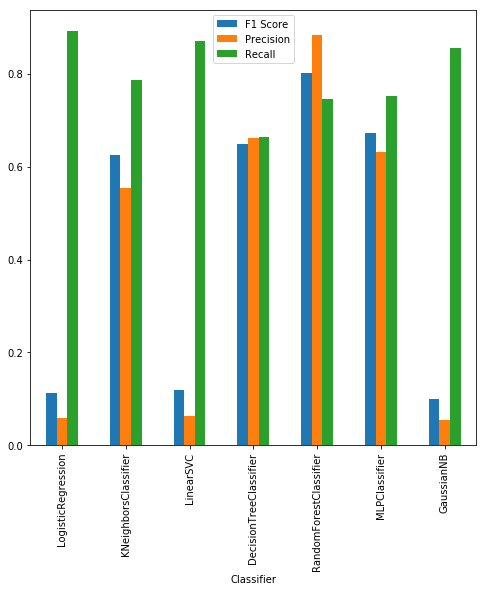

In [95]:
log_over.plot(x="Classifier", y=["F1 Score", "Precision", "Recall"], kind="bar", figsize=(8,8))
plt.show()

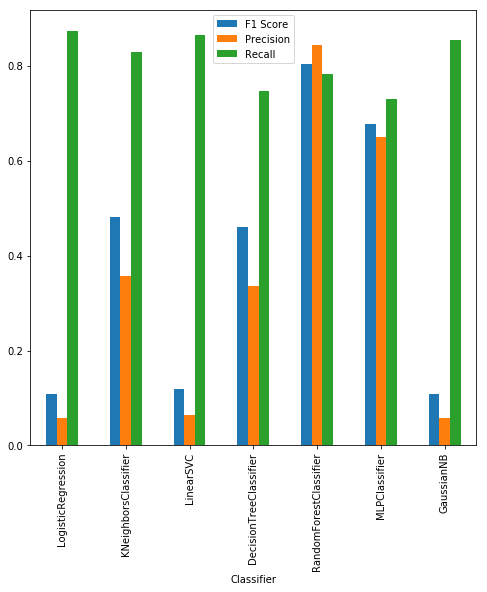

In [96]:
log_smote.plot(x="Classifier", y=["F1 Score", "Precision", "Recall"], kind="bar", figsize=(8,8))
plt.show()

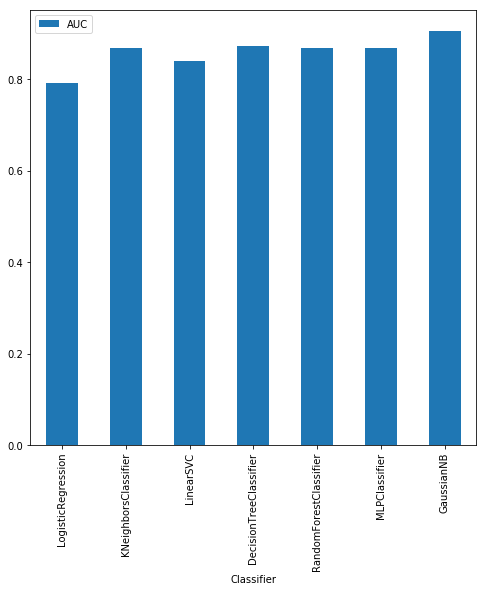

In [97]:
log_original.plot(x="Classifier", y=["AUC"], kind="bar", figsize=(8,8))
plt.show()



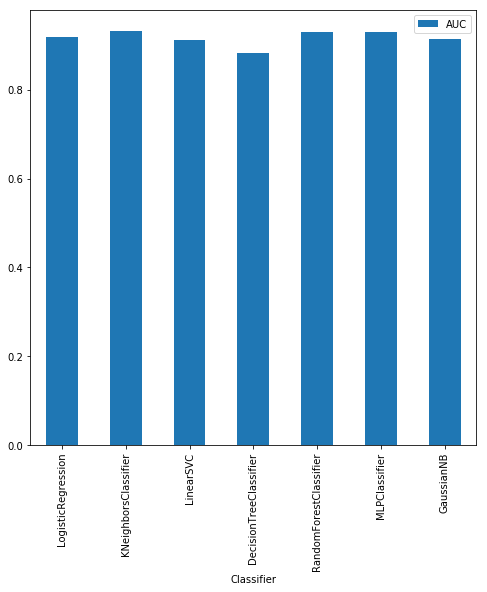

In [98]:
log_under.plot(x="Classifier", y=["AUC"], kind="bar", figsize=(8,8))
plt.show()



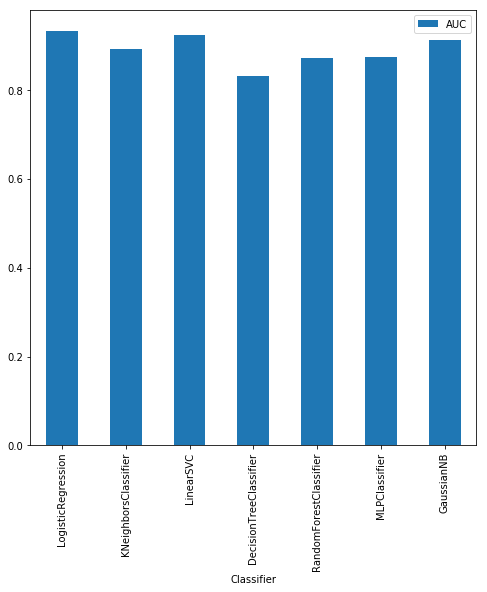

In [99]:
log_over.plot(x="Classifier", y=["AUC"], kind="bar", figsize=(8,8))
plt.show()



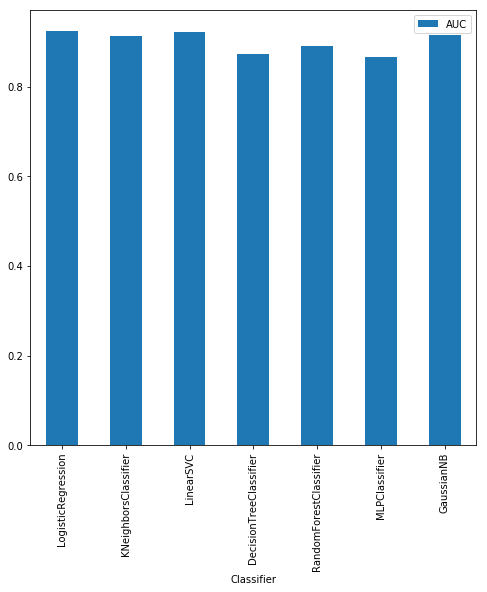

In [100]:
log_smote.plot(x="Classifier", y=["AUC"], kind="bar", figsize=(8,8))
plt.show()

## Taking RandomForest and tuning for best possible result

An overall majority classifier that appears to be most suited to this problem is the Random Forest Classifier. This classifier can maintain precision the best when resampling the data, to leave a respectable F1-score. Here, we take this classifier as the most suited and fine tune it to try and squeeze the best possible result...

#### Tuning three prominent parameters:
#### n_estimators={10, 100,200},  criterion={'gini', entropy}, max_features={'auto',log2}

Code in custom-cv-runs.

In [101]:
'''
[['RandomForestClassifier', 0.80310735939302502, 0.84838839253169562, 0.77439024390243905, datetime.timedelta(0, 22, 854772)], 
 ['RandomForestClassifier', 0.80134412203377714, 0.83486871215963909, 0.78455284552845528, datetime.timedelta(0, 17, 443312)], 
 ['RandomForestClassifier', 0.77542214632977435, 0.78594378789614616, 0.7825203252032521, datetime.timedelta(0, 20, 505811)], 
 ['RandomForestClassifier', 0.81534391534391537, 0.85003931074672978, 0.79674796747967491, datetime.timedelta(0, 18, 527809)], 
 ['RandomForestClassifier', 0.81697793752433112, 0.85946782785879117, 0.79065040650406504, datetime.timedelta(0, 219, 242425)], 
 ['RandomForestClassifier', 0.82194169531860661, 0.84974358974358977, 0.80691056910569114, datetime.timedelta(0, 214, 48315)], 
 ['RandomForestClassifier', 0.82153339873196618, 0.85130515130515139, 0.80487804878048796, datetime.timedelta(0, 176, 436813)], 
 ['RandomForestClassifier', 0.81766738578277387, 0.85984426820475834, 0.79065040650406504, datetime.timedelta(0, 227, 616945)], 
 ['RandomForestClassifier', 0.82211208035950312, 0.85931385274873762, 0.79878048780487809, datetime.timedelta(0, 436, 84050)], 
 ['RandomForestClassifier', 0.82702497937955, 0.85378202383278534, 0.81300813008130079, datetime.timedelta(0, 419, 267422)], 
 ['RandomForestClassifier', 0.82550831970847571, 0.85240555881777258, 0.8109756097560975, datetime.timedelta(0, 345, 739678)], 
 ['RandomForestClassifier', 0.81691409011422411, 0.85853996031461433, 0.79065040650406504, datetime.timedelta(0, 427, 927862)]]
[0.80310735939302502, 0.80134412203377714, 0.77542214632977435, 0.81534391534391537, 0.81697793752433112, 0.82194169531860661, 0.82153339873196618, 0.81766738578277387, 0.82211208035950312, 0.82702497937955, 0.82550831970847571, 0.81691409011422411]
best perfomer: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

'''

"\n[['RandomForestClassifier', 0.80310735939302502, 0.84838839253169562, 0.77439024390243905, datetime.timedelta(0, 22, 854772)], \n ['RandomForestClassifier', 0.80134412203377714, 0.83486871215963909, 0.78455284552845528, datetime.timedelta(0, 17, 443312)], \n ['RandomForestClassifier', 0.77542214632977435, 0.78594378789614616, 0.7825203252032521, datetime.timedelta(0, 20, 505811)], \n ['RandomForestClassifier', 0.81534391534391537, 0.85003931074672978, 0.79674796747967491, datetime.timedelta(0, 18, 527809)], \n ['RandomForestClassifier', 0.81697793752433112, 0.85946782785879117, 0.79065040650406504, datetime.timedelta(0, 219, 242425)], \n ['RandomForestClassifier', 0.82194169531860661, 0.84974358974358977, 0.80691056910569114, datetime.timedelta(0, 214, 48315)], \n ['RandomForestClassifier', 0.82153339873196618, 0.85130515130515139, 0.80487804878048796, datetime.timedelta(0, 176, 436813)], \n ['RandomForestClassifier', 0.81766738578277387, 0.85984426820475834, 0.79065040650406504, da

### F1 scores:

0.803107359393 //
0.801344122034 //
0.77542214633 //
0.815343915344 //
0.816977937524 //
0.821941695319 //
0.821533398732 //
0.817667385783 //
0.82211208036 //
0.82702497938 //
0.825508319708 //
0.816914090114 //

In [102]:
''' Tuned Random Forest Classifier, the best performer:

['RandomForestClassifier', 0.827025, 0.853782, 0.813008, datetime.timedelta(0, 419, 267422)] 

F1 SCORE = 0.827025

'''

" Tuned Random Forest Classifier, the best performer:\n\n['RandomForestClassifier', 0.827025, 0.853782, 0.813008, datetime.timedelta(0, 419, 267422)] \n\nF1 SCORE = 0.827025\n\n"

### Best params: criterion='entropy', max_features='auto', n_estimators=200
---

## Evaluation Summary


### Original vs Under-Sampled

The results certainly show that undersampling performs extremely well. However when we intuitively think about why this is so, it is perhaps not the wise approach. When under-sampling we have reduced the amount of information we have from over 200,000 real life examples (albeit benign transactions) and brought this down to merely <500. 
By doing this, as mentioned, we lose a *lot* of information that the classifier could learn from and hence become more generalisable. It is likely the case that we just overfit to the small dataset.

To this end, it would appear that perhaps no sampling is better here. The original data performed fairly well across the board of classifiers, with precision being stronger as the majority. 

### Oversample vs SMOTE

As seen, the results for Oversampling are marginally higher than that of SMOTE but due to the understanding of how the algorithms work and how we resample inside the cross validation loop, it is easy to understand why these results are likely to be biased.

Oversampling simply duplicates datapoints randomly, so there is a lot of redundant data floating around. This means it is likely that during the CV process, the testing fold will likely contain duplicate data as in some of the training folds and therefore we have a 'leakage' of test data. This would explain why Oversampling appears to achieve better results.

For this reason, taking the results of SMOTE is preferred, as it is more 'true'. This is because SMOTE uses K Nearest Neigbours to pick a nearby datapoint at random and then it randomly extrapolates this point in either the positive of negative direction by an amount in the range [0,1]. Effectively, this creates new data points which is a lot better to train on than duplicate information.

### Original vs SMOTE

The question then begs, is SMOTE worth it at all? Given that the original dataset achieves quite well in comparison. Well, it depends what we care about most. If we care about Recall and hence catching fraudluent transactions, then SMOTE has an advantage here. Taking the best achieving classifier, that is RandomForest, we can see that by using SMOTE we have a considerable margin on Recall, at the expense of some precision, but maintaining a marginally hgiher F1 score overall. So, by considering the classifier that appears to be suited for the problem at hand, SMOTE allows us to achieve higher than the original dataset.

### Test_Train_Split vs Custom cross_val_score using KFold
#### How a difference in splitting can influence results

To represent the importance of ensuring all of the data is used to validate the model (using KFold), we look at the results of using test_train_split to split the data and then resampling the training data only (to preserve test data) and then averaging this n times. This variation in results show that we have to be careful in cross validating correctly in order to achieve the most true results.

### Best classifier

An overall majority classifier that appears to be most suited to this problem is the Random Forest Classifier. This classifier can maintain precision the best when resampling the data, to leave a respectable F1-score. Taking this classifier as the most suited and fine tuning it to try and squeeze the best possible result gave an F1 score of 0.827025, using SMOTE. This can be used as an estimate of the best value we can achieve from baseline work, for use in comparisons with later models. 

# Results Appendix

In [103]:
 ''' Accounting properly for sampling in CV
 
 ORIGINAL
 ==============================
Cross validation training results: 
                        F1 Score  Precision    Recall   Training Time
Classifier
LogisticRegression      0.679526   0.858680  0.585366 00:00:02.101358
KNeighborsClassifier    0.773953   0.834210  0.733740 00:00:00.672486
LinearSVC               0.702664   0.911093  0.609756 00:00:44.615623
DecisionTreeClassifier  0.648748   0.584061  0.747967 00:00:12.705187
RandomForestClassifier  0.789572   0.867006  0.737805 00:00:11.946860
MLPClassifier           0.740725   0.789986  0.701220 00:00:10.611695
GaussianNB              0.114077   0.061255  0.833333 00:00:00.110761
==============================

UNDER
==============================
Cross validation training results: 
                        F1 Score  Precision    Recall   Training Time
Classifier
LogisticRegression      0.920479   0.962354  0.882114 00:00:00.005487
KNeighborsClassifier    0.929551   0.978015  0.886179 00:00:00.000986
LinearSVC               0.908181   0.955016  0.865854 00:00:00.016134
DecisionTreeClassifier  0.900284   0.910581  0.890244 00:00:00.009997
RandomForestClassifier  0.915486   0.952169  0.882114 00:00:00.040110
MLPClassifier           0.916529   0.956296  0.880081 00:00:00.545562
GaussianNB              0.900877   0.965324  0.845528 00:00:00.001272
==============================

OVER
==============================
Cross validation training results: 
                        F1 Score  Precision    Recall   Training Time
Classifier
LogisticRegression      0.111893   0.059767  0.892276 00:00:03.679684
KNeighborsClassifier    0.634392   0.563856  0.798780 00:00:01.675460
LinearSVC               0.117779   0.063179  0.871951 00:01:19.514793
DecisionTreeClassifier  0.649036   0.661330  0.664634 00:00:07.959666
RandomForestClassifier  0.801992   0.884864  0.745935 00:00:10.799792
MLPClassifier           0.658083   0.595006  0.774390 00:00:24.078549
GaussianNB              0.100591   0.053461  0.855691 00:00:00.198887
==============================

SMOTE
==============================
Cross validation training results: 
                        F1 Score  Precision    Recall   Training Time
Classifier
LogisticRegression      0.106679   0.056839  0.884146 00:00:03.850433
KNeighborsClassifier    0.500628   0.375985  0.831301 00:00:01.722399
LinearSVC               0.116943   0.062724  0.867886 00:01:21.129306
DecisionTreeClassifier  0.441011   0.325126  0.711382 00:00:23.395320
RandomForestClassifier  0.806464   0.833590  0.794715 00:00:21.880070
MLPClassifier           0.709039   0.708030  0.725610 00:00:24.371739
GaussianNB              0.107311   0.057277  0.855691 00:00:00.193990
==============================
 
 '''

' Accounting properly for sampling in CV\n\nORIGINAL\n==============================\nCross validation training results: \n                       F1 Score  Precision    Recall   Training Time\nClassifier\nLogisticRegression      0.679526   0.858680  0.585366 00:00:02.101358\nKNeighborsClassifier    0.773953   0.834210  0.733740 00:00:00.672486\nLinearSVC               0.702664   0.911093  0.609756 00:00:44.615623\nDecisionTreeClassifier  0.648748   0.584061  0.747967 00:00:12.705187\nRandomForestClassifier  0.789572   0.867006  0.737805 00:00:11.946860\nMLPClassifier           0.740725   0.789986  0.701220 00:00:10.611695\nGaussianNB              0.114077   0.061255  0.833333 00:00:00.110761\n==============================\n\nUNDER\n==============================\nCross validation training results: \n                       F1 Score  Precision    Recall   Training Time\nClassifier\nLogisticRegression      0.920479   0.962354  0.882114 00:00:00.005487\nKNeighborsClassifier    0.929551   

In [104]:
''' Naive averaging, using test_train_split only. 
    Oversampling training split and preserving test set, averaging over 3 runs
    
SUMMARY OF RESULTS (AVG over three random iterations)
==============================
Cross validation training results: 
               Classifier  F1 Score  Precision    Recall   Training Time
0      LogisticRegression  0.711097   0.849243  0.612047 00:00:01.661159
0    KNeighborsClassifier  0.846665   0.950516  0.763758 00:00:00.692843
0               LinearSVC  0.798250   0.891613  0.723210 00:00:49.479348
0  DecisionTreeClassifier  0.941819   0.954909  0.929109 00:00:09.491732
0  RandomForestClassifier  0.932806   0.992030  0.880539 00:00:12.129519
0           MLPClassifier  0.867500   0.963761  0.789322 00:00:10.706168
0              GaussianNB  0.122036   0.065706  0.856953 00:00:00.100451
==============================
'''

' Naive averaging, using test_train_split only. \n    Oversampling training split and preserving test set, averaging over 3 runs\n    \nSUMMARY OF RESULTS (AVG over three random iterations)\n==============================\nCross validation training results: \n               Classifier  F1 Score  Precision    Recall   Training Time\n0      LogisticRegression  0.711097   0.849243  0.612047 00:00:01.661159\n0    KNeighborsClassifier  0.846665   0.950516  0.763758 00:00:00.692843\n0               LinearSVC  0.798250   0.891613  0.723210 00:00:49.479348\n0  DecisionTreeClassifier  0.941819   0.954909  0.929109 00:00:09.491732\n0  RandomForestClassifier  0.932806   0.992030  0.880539 00:00:12.129519\n0           MLPClassifier  0.867500   0.963761  0.789322 00:00:10.706168\n0              GaussianNB  0.122036   0.065706  0.856953 00:00:00.100451\n==============================\n'

In [105]:
''' Tuned Random Forest Classifier, the best performer:

['RandomForestClassifier', 0.827025, 0.853782, 0.813008, datetime.timedelta(0, 419, 267422)] 

F1 SCORE = 0.827025

'''

" Tuned Random Forest Classifier, the best performer:\n\n['RandomForestClassifier', 0.827025, 0.853782, 0.813008, datetime.timedelta(0, 419, 267422)] \n\nF1 SCORE = 0.827025\n\n"